In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

# DataFrame 활용

In [3]:
num = ['1번', '2번', '3번', '4번', '5번', '6번', '7번', '8번']
name = ['채치수', '정대만', '송태섭', '서태웅', '강백호', '변덕규', '황태산', '윤대협']
school = ['북산', '북산', '북산', '북산', '북산', '능남', '능남', '능남']
height = [197, 184, 168, 187, 188, 202, 188, 190]
korean = [90, 40, 80, 40, 15, 80, 55, 100]
eng = [85, 35, 75, 60, 20, 100, 65, 85]
math = [100, 50, 70, 70, 10, 95, 45, 90]
science = [95, 55, 80, 75, 35, 85, 40, 95]
society = [85, 25, 75, 80, 10, 80, 35, 95]
sw = ['Python', 'Java', 'Javascript', np.NaN, np.NaN, 'C', 'Python', 'C#']

df = pd.DataFrame([num, name, school, height, korean, eng, math, science, society, sw]).T
df.columns = ['지원번호', '이름', '학교', '키', '국어', '영어', '수학', '과학', '사회', 'SW']

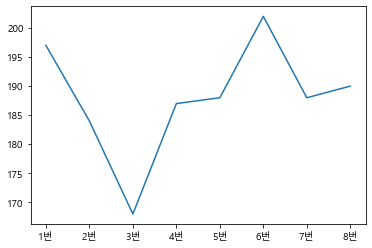

In [30]:
plt.plot(df['지원번호'], df['키'])

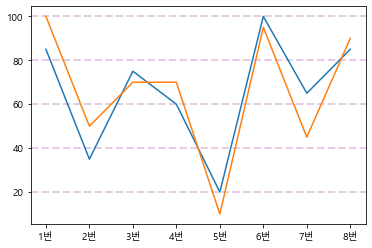

In [41]:
plt.plot(df['지원번호'], df['영어'])
plt.plot(df['지원번호'], df['수학'])

plt.grid(axis = 'y', # axis = 'x' or 'y'
         color = 'purple', # color 적용 가능
         alpha = 0.2, # 투명도 조절 가능
         linewidth = 2, # 두께 조절 가능
         linestyle = '--')

# 누적 막대 그래프

<BarContainer object of 8 artists>

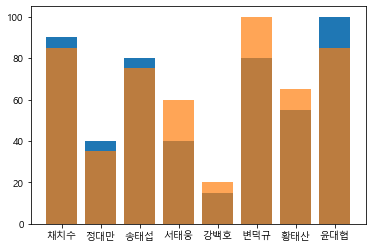

In [48]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'], alpha = 0.7) # 겹쳐서 그려진다.

<BarContainer object of 8 artists>

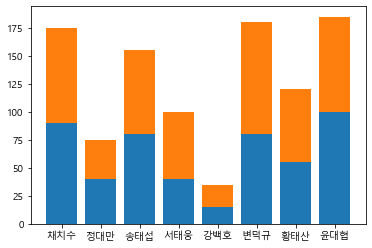

In [54]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'], bottom = df['국어'])

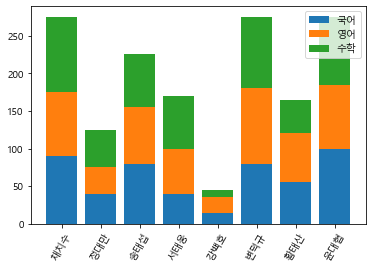

In [64]:
plt.bar(df['이름'], df['국어'],label = '국어')
plt.bar(df['이름'], df['영어'], bottom = df['국어'], label = '영어')
plt.bar(df['이름'], df['수학'], bottom = df['국어'] + df['영어'], label = '수학')

plt.xticks(rotation = 60)
plt.legend(loc = 'upper right')

plt.show()

# 다중 막대 그래프

N: 8
index: [0 1 2 3 4 5 6 7]


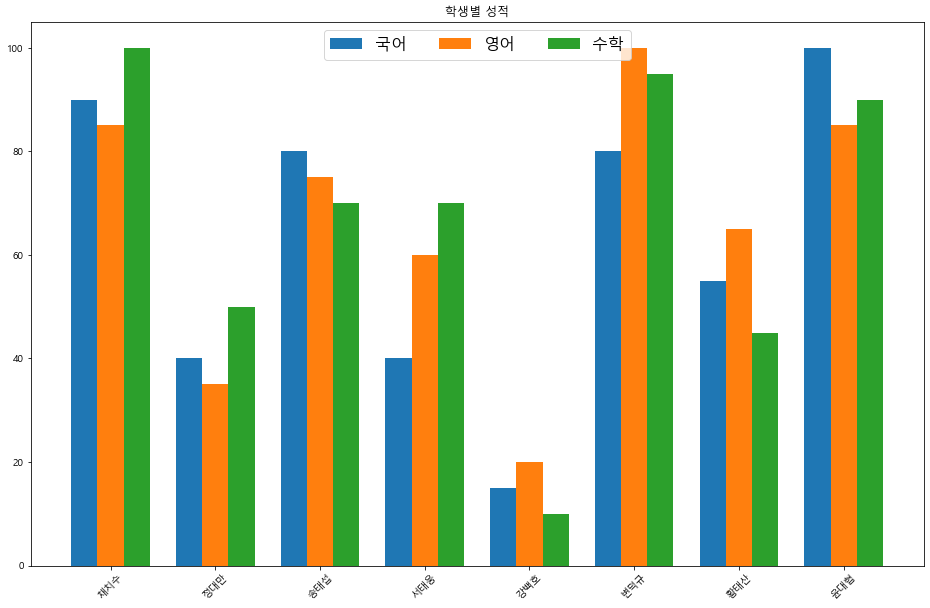

In [96]:
N = df.shape[0]
print('N:', N)

index = np.arange(N)
print('index:', index)

width = 0.25

plt.figure(figsize = (16, 10))

plt.bar(index-width, df['국어'], width = width, label = '국어')
plt.bar(index, df['영어'], width = width, label = '영어')
plt.bar(index+width, df['수학'], width = width, label = '수학')

plt.title('학생별 성적')
plt.xticks(df.index, df['이름'], rotation = 45)
plt.legend(ncol = 3, loc = 'upper center', fontsize = 16)

plt.show()

# 원 그래프

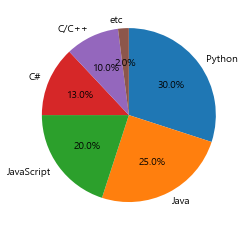

In [4]:
values = [30, 25, 20, 13, 10, 2]
labels = ['Python', 'Java', 'JavaScript', 'C#', 'C/C++', 'etc']

plt.pie(values,
        labels = labels,
        autopct = '%.1f%%',
        startangle = 90,
        counterclock = False)

plt.show()

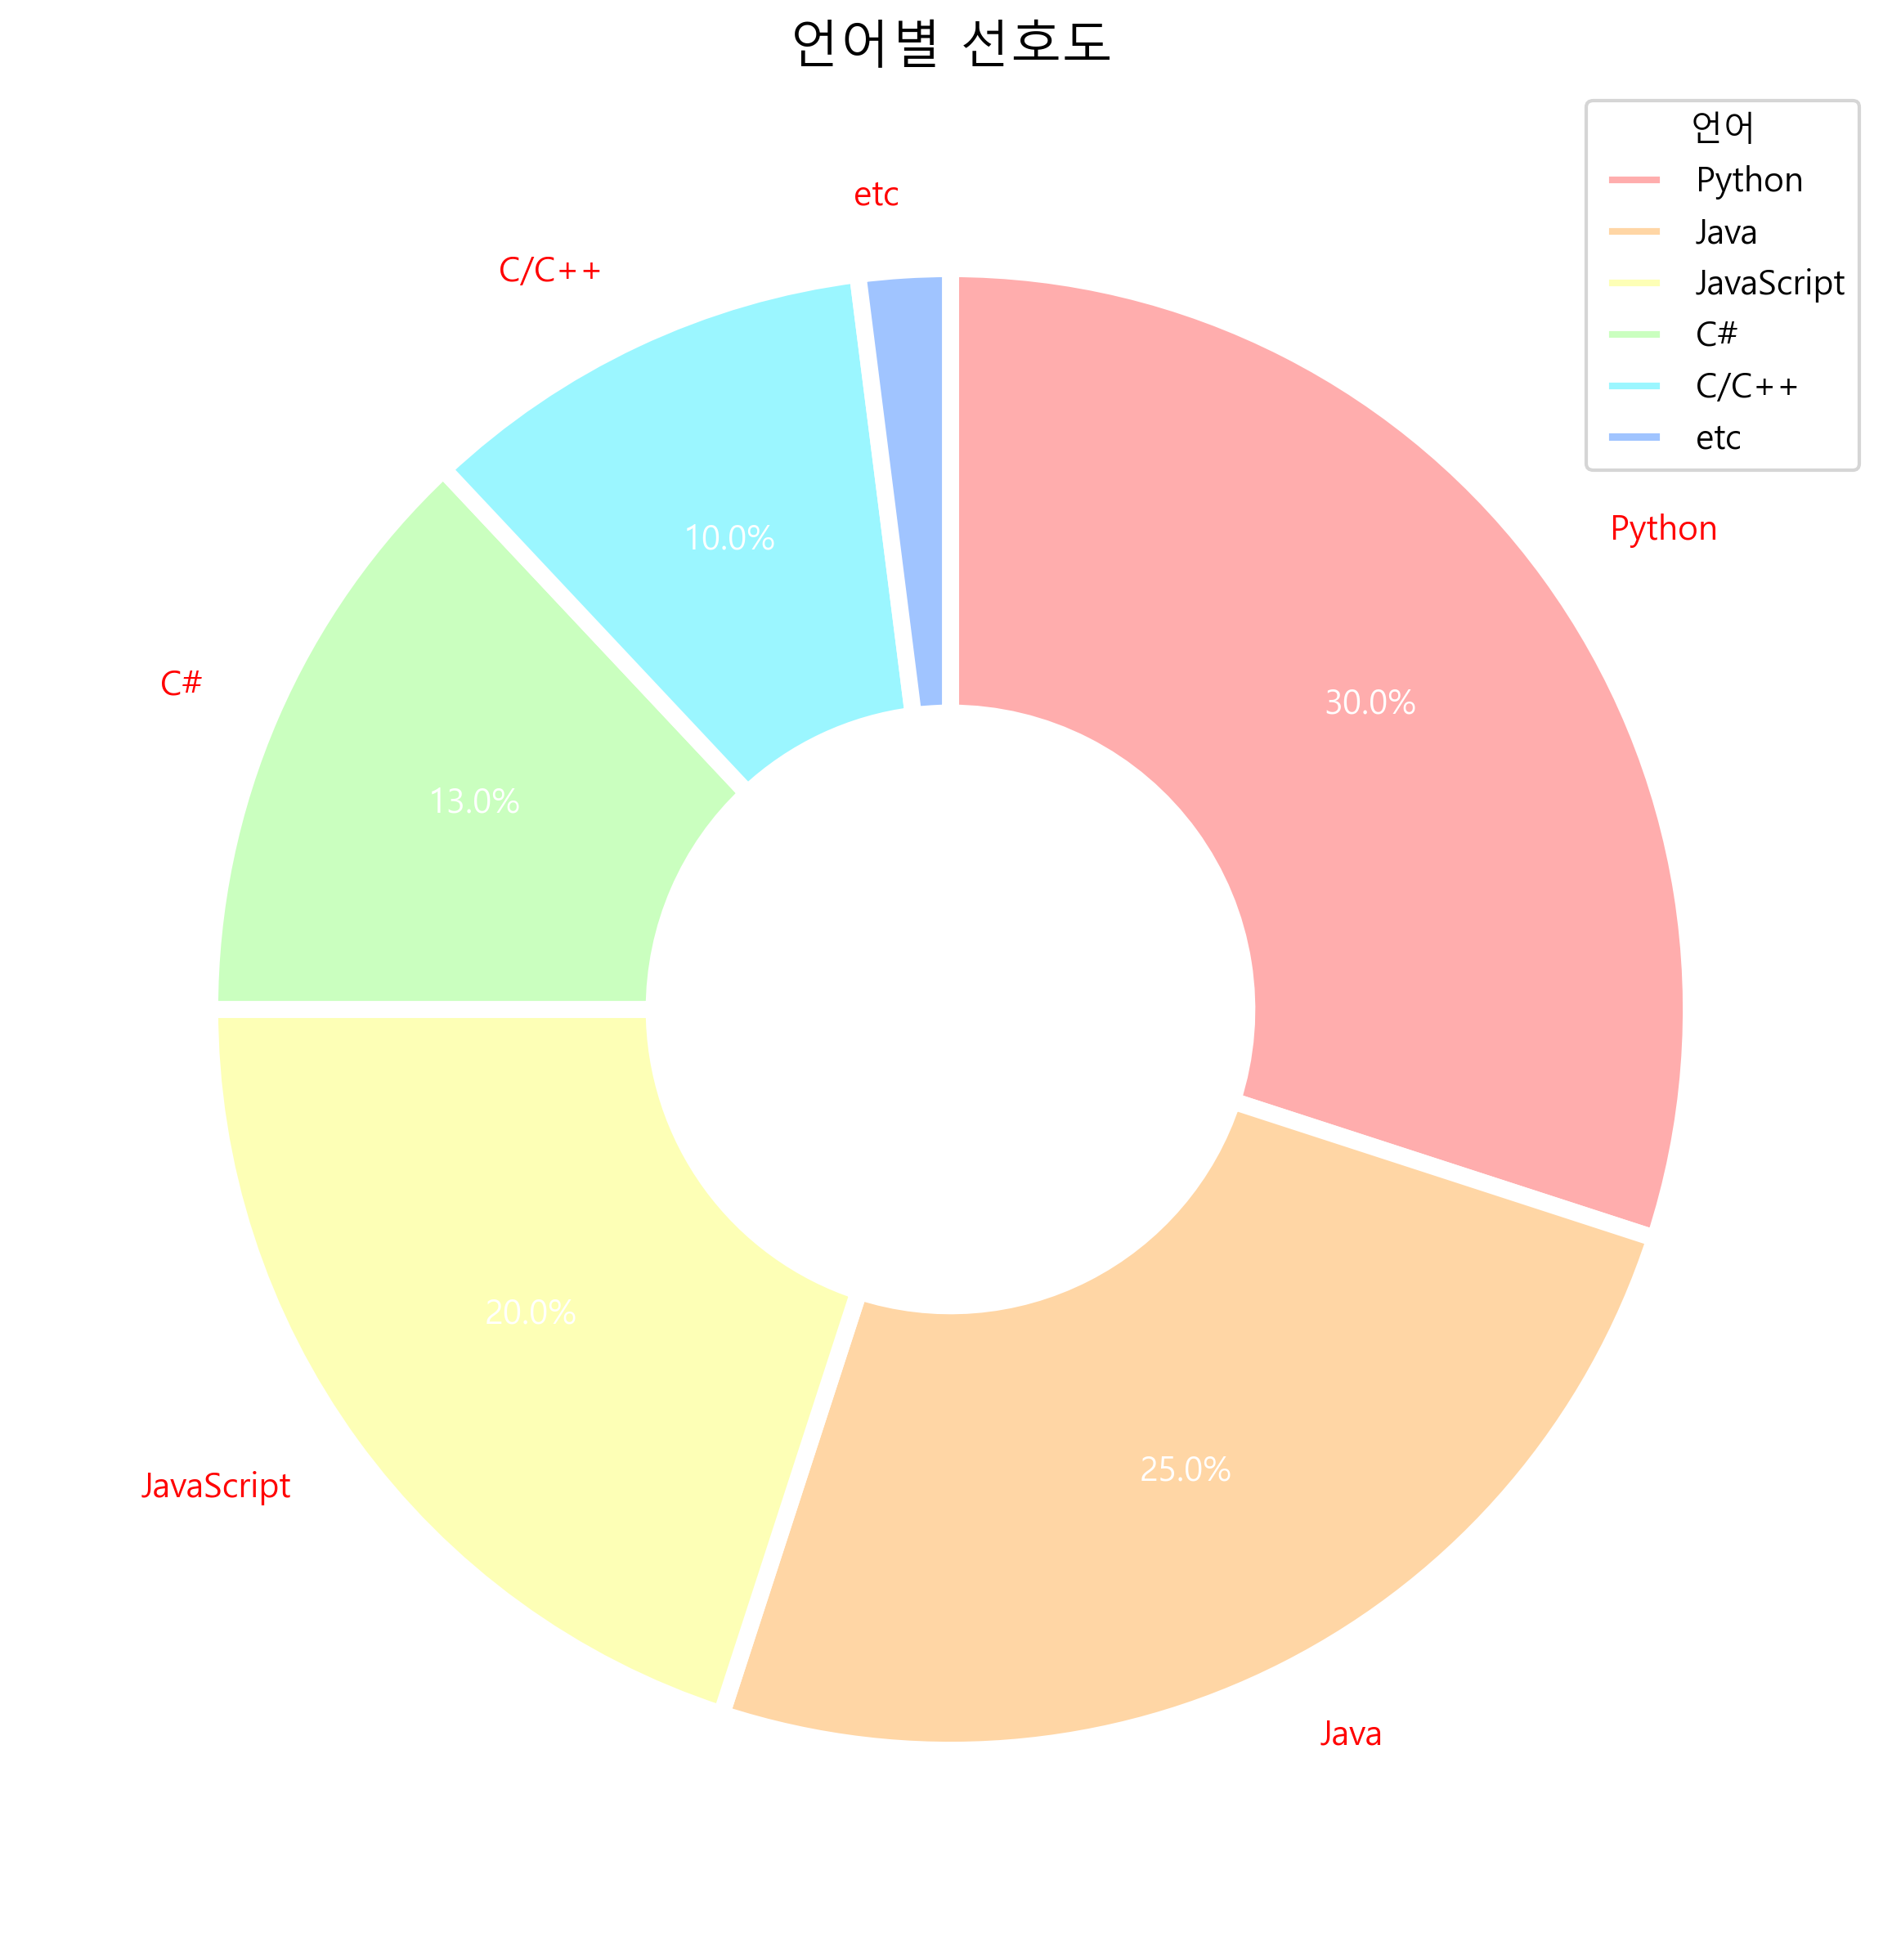

In [10]:
values = [30, 25, 20, 13, 10, 2]
labels = ['Python', 'Java', 'JavaScript', 'C#', 'C/C++', 'etc']
explode = [0.05, 0.02, 0, 0, 0, 0] # 파이 사이에 이격 거리 지정 가능
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff'] # 파이 색깔 지정 가능
wedgeprops = {'width': 0.6,
              'edgecolor': 'w',
              'linewidth': 5}

def custom_autopct(pct):
    return ('%.1f%%' % pct) if pct >= 10 else ''

plt.figure(figsize = (16, 10), dpi = 300)

patches, texts, autotexts = plt.pie(values,
                                    labels = labels,
                            #         explode = explode,
                                    autopct = custom_autopct,
                                    startangle = 90,
                                    counterclock = False,
                                    colors = colors,
                                    wedgeprops = wedgeprops,
                                    pctdistance = 0.7) # 폰트 색도 변경 가능한가?

[text.set_color('red') for text in texts]
[autotext.set_color('w') for autotext in autotexts]

plt.title('언어별 선호도', fontsize = 15)
plt.legend(title = '언어', loc = 'upper right')

plt.show()

### DataFrame 활용

In [18]:
grp = df.groupby(['학교'])

([<matplotlib.patches.Wedge at 0x2a0048d4640>,
 [Text(0.42095177560159885, 1.0162674857624154, '능남'),
  Text(-0.4209517756015994, -1.0162674857624152, '북산')])

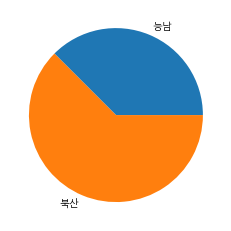

In [44]:
values = list(grp.size().values)
labels = list(grp.size().index)

plt.pie(values, labels = labels)

# 산점도

In [49]:
# 영어, 수학 성적의 분포 확인

df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]

display(df)

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW,학년
0,1번,채치수,북산,197,90,85,100,95,85,Python,3
1,2번,정대만,북산,184,40,35,50,55,25,Java,3
2,3번,송태섭,북산,168,80,75,70,80,75,Javascript,2
3,4번,서태웅,북산,187,40,60,70,75,80,NaN,1
4,5번,강백호,북산,188,15,20,10,35,10,NaN,1
5,6번,변덕규,능남,202,80,100,95,85,80,C,3
6,7번,황태산,능남,188,55,65,45,40,35,Python,2
7,8번,윤대협,능남,190,100,85,90,95,95,C#,2


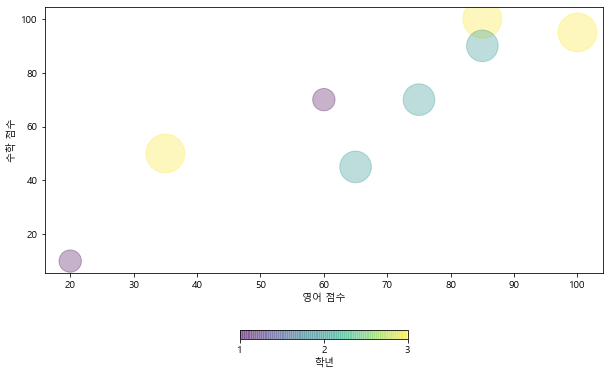

In [63]:
sizes = df['학년'] * 500

plt.figure(figsize = (10, 7))

plt.scatter(df['영어'], df['수학'],
            s = sizes,
            c = df['학년'],
            cmap = 'viridis',  # matplotlib cmap 확인
            alpha = 0.3,
           )

plt.xlabel('영어 점수') 
plt.ylabel('수학 점수')
plt.colorbar(ticks = [1, 2, 3],
             label = '학년',
             shrink = 0.3,
             orientation = 'horizontal',
            )

plt.show()

# 여러개의 그래프

Text(0.5, 0.98, '여러 그래프 넣기')

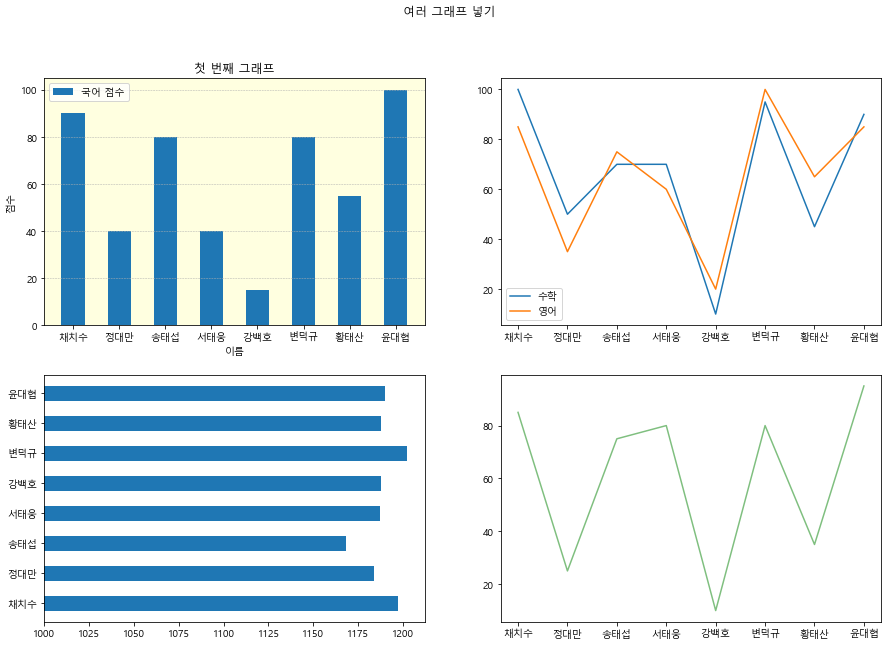

In [82]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10)) # 2x2에 해당하는 plot 생성

# 첫 번째 그래프
axes[0, 0].bar(df['이름'], df['국어'], label = '국어 점수',
               width = 0.5)
axes[0, 0].legend() # 범례 설정
axes[0, 0].set_title('첫 번째 그래프') # 그래프 별 제목 설정
axes[0, 0].set(xlabel = '이름', ylabel = '점수') # x, y축 label 설정
axes[0, 0].set_facecolor('lightyellow') # 전경색 지정
axes[0, 0].grid(linestyle = '--', linewidth = '0.5', axis = 'y')

# 두 번째 그래프
axes[0, 1].plot(df['이름'], df['수학'], label = '수학')
axes[0, 1].plot(df['이름'], df['영어'], label = '영어')
axes[0, 1].legend()

# 세 번째 그래프
axes[1, 0].barh(df['이름'], df['키'],
                height = 0.5, # 막대 두께
                left = 0 # 누적 그래프 작성을 위한 입력 값
                )

# 네 번째 그래프
axes[1, 1].plot(df['이름'], df['사회'], color = 'g', alpha = 0.5)

fig.suptitle('여러 그래프 넣기') # Super Title